
# Modeling the Behavior of an RLC Circuit with an AC input


I. Importing Python libraries that are applicable in the following essay. 

In this essay, a number of libraries are used besides ModSim, including control, numpy, scipy and matplotlib.pyplot. The existing functions in these imported libraries make the code clearer and more succint. 

In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import control as cntrl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

II. Defining system

In this section, the system (the value of the inductor, capacitor and resistor) are being defined. By running make_system, a set of system value is updated. 

<img src="RLC.png" alt="Drawing" style="width: 200px;"/>

In [4]:
def make_params(L, C, R):
    return Params(L = L, C = C, R = R)

def make_system(params): 
    unpack(params)
    
    
    sim_timestep = 0.01
    return System(L = L, C = C, R = R, sim_timestep = sim_timestep)
params = make_params(4.7e-5, 4.7e-5, 1e3)
system = make_system(params)

,values
L,0.000047
C,0.000047
R,1000.000000
sim_timestep,0.010000


III. Defining the transverse function of the circuit. 

The function used for modeling for this circuit is generated by the transfer function of an RLC circuit: 
$\frac{V_o}{V_i}=\frac{(ω^2)RC}{\sqrt{(1-ω^2LC)^2+(ωRC)^2}}$.

By seperating the coefficients of ω, the equation is more explicitly shown. The "top" and "bottom" in the following section presents the numerator and denominators of the transfer function. 


In [5]:
top = np.asarray([1])
bottom = np.asarray([system.L*system.C, system.R*system.C, 1])

array([2.209e-09, 4.700e-02, 1.000e+00])

In [6]:
sys_tf = cntrl.tf(top, bottom)
sys_ss = cntrl.tf2ss(sys_tf)
sys_ss_d = cntrl.c2d(sys_ss, system.sim_timestep)
np.zeros((sys_ss_d.B.shape[0], 1))

array([[0.],
       [0.]])

IV. Defining step functions

A step function is used to simulate the step response of the circuit. "Matmul" (matrix multiplication) is used to present the output of this function. 

In [7]:
def step(sys, mag=1.0, time=5):
    state = np.zeros((sys.A.shape[0], 1))
    dt = sys.dt
    t = []
    y = []
    for i in range(int(time/dt)):
        state = np.matmul(sys.A, state) + sys.B*mag
        output = np.matmul(sys.C, state)
        t.append(i*dt)
        y.append(float(output))
    return t,y

In [8]:
t, y = step(sys_ss_d, mag=1.0, time=1)

V. Graphing the results

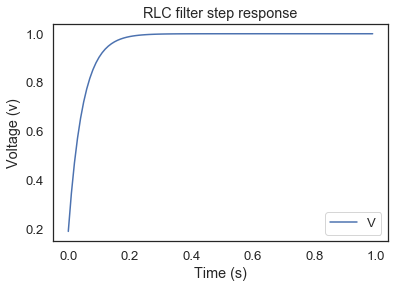

In [9]:
plt.plot(t, y)
plt.legend("V")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (v)")
plt.title("RLC filter step response")
plt.show()



In [10]:
def lsim(sys, vec):
    state = np.zeros((sys.A.shape[0], 1))
    dt = sys.dt
    t = []
    y = []
    for i in range(len(vec)):
        state = np.matmul(sys.A, state) + sys.B*vec[i]
        output = np.matmul(sys.C, state)
        t.append(i*dt)
        y.append(float(output))
    return t,y

In [11]:
sin_x = np.linspace(0, 8*np.pi, 100)
sin_y = np.sin(sin_x)
t, y = lsim(sys_ss_d, sin_y)
sin_x /= 8*np.pi

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

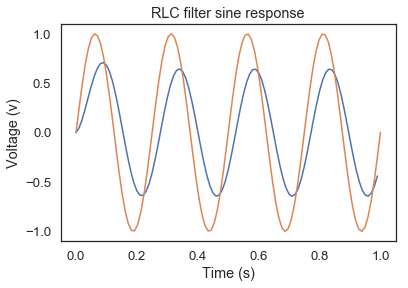

In [12]:
plt.plot(t, y, sin_x, sin_y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (v)")
plt.title("RLC filter sine response")
plt.show()

In [13]:
def slope_func(state, t, system): 
    unpack(system)
    V_out, I = state
    
    dV_outdt = 
    dIdt = 
    
    return dV_outdt, dIdt

SyntaxError: invalid syntax (<ipython-input-13-de75d8996b0f>, line 5)

In [14]:
results, detail = run_ode_solver(system, slope_func,
t_eval=data.index)

NameError: name 'slope_func' is not defined

In [ ]:
def plot_results_V(results):
    
    plot(results.V_out, 'g-')

    decorate(xlabel=xlabel,
             ylabel='$V_{out}$ (volt)')
    
plot_results_V(results)

         

In [ ]:
def plot_results_I(results):
    
    plot(results.I, 'b-')
    
    decorate(xlabel = xlabel, 
             ylabel = ('$I$(A)')

plot_results_I(results)  

In [ ]:
def compute_vin(results, system):
   
    unpack(system)
    V_in = A * np.cos(omega * results.index)
    return TimeSeries(V_in, results.index, name='V_in')

def estimate_A(series):
    return (series.max() - series.min()) / 2

corr = np.correlate(V_out, V_in, mode='same')
corr = TimeSeries(corr, V_in.index)

def compute_offset(corr):
    peak_time = corr.idxmax()
    period = 1 / system.f
    frac, whole = np.modf(peak_time / period)
    return frac

In [ ]:
fs = [1, 10, 100, 1000, 10000, 100000]

def sweep_freq():
    ratios = TimeSeries()
    offsets = TimeSeries()
    
    for i, f in enumerate(fs):
        system = make_system(Params(params, f=f))
        series = compute_vin(results, system)
        V = estimate_A(series)
        A_in = estimate_A(V_in)
        A_out = estimate_A(V_out)

        ratios = A_out / A_in
        offsets = compute_offset(corr)


    return ratios, offsets
